## ESERCIZIO 7

in questo esercizio abbiamo completato un algoritmo di dinamica molecolare.
questo algoritmo si basa su passi puramente stocastici, determinati con l'algoritmo di Metropolis, quindi è un approccio del tutto diverso dall'algoritmo di Verlet che invece usa le equazoni del moto.

### ESERCIZIO 7.1

in questo esercizio abbiamo fatto un'analisi di tipo statistico al fine di valutare la correlazione dei risultati della simulazione.
l'obiettivo di questo esercizio è stabilire il numero ottimale di componenti per ogni blocco in modo tale da ottenere blocchi con valori scorrelati tra loro e stimare il numero di passi adeguato per equilibrare il sistema.

per fare ciò abbiamo avviato una simulazione di $5*10^5$ step e ad ogni step abbiamo misurato l'energia per particella e la pressione del sistema. 
la simulazione è stata svolta per le 3 fasi: solida, liquida e gassosa.

dopo aver fatto questa simulazione in C++, ho passato i dati su Phython dove ho eseguito l'analisi.

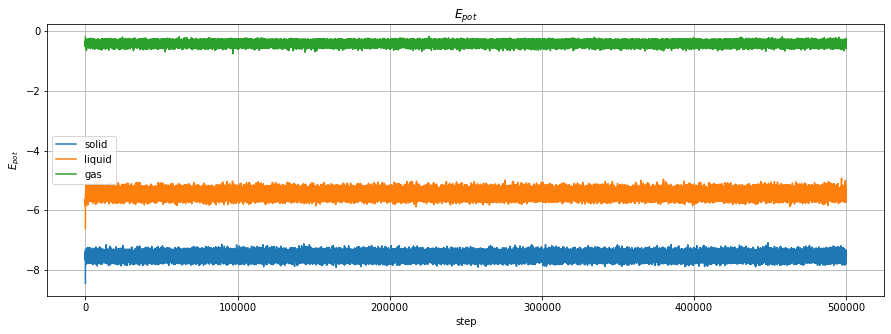

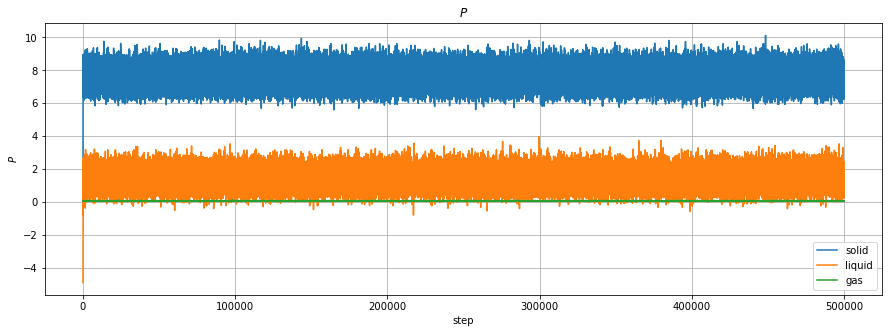

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

epot_eq_S=np.loadtxt("epot_eq_S")
pres_eq_S=np.loadtxt("pres_eq_S")
epot_eq_L=np.loadtxt("epot_eq_L")
pres_eq_L=np.loadtxt("pres_eq_L")
epot_eq_G=np.loadtxt("epot_eq_G")
pres_eq_G=np.loadtxt("pres_eq_G")

x=np.arange(0, len(epot_eq_S),1)

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(x,epot_eq_S, label="solid")
plt.plot(x,epot_eq_L, label="liquid")
plt.plot(x,epot_eq_G, label="gas")
plt.xlabel('step')
plt.ylabel("$E_{pot}$")
plt.grid(True)
plt.title("$E_{pot}$")
plt.legend()
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(x,pres_eq_S, label="solid")
plt.plot(x,pres_eq_L, label="liquid")
plt.plot(x,pres_eq_G, label="gas")
plt.xlabel('step')
plt.ylabel("$P$")
plt.grid(True)
plt.title("$P$")
plt.legend()
plt.show()

### equilibrazione
come prima cosa ho deciso di valutare quanti passi siano necessari per il raggiungimento di uno stato di equilibrio.
quindi ho fatto ulteriori grafici dell'energia in cui ho zoomato solo sulla prima parte di equilibrazione. 
sotto ci sono i grafici dell'energia nei primi $500$ step per le 3 fasi. 
il sistema va molto rapidamente all'equilibrio, ad ogni modo per essere certa di operare su un sistema equilibrato ho impostato sempre $200$ step per l'equilibrazione.

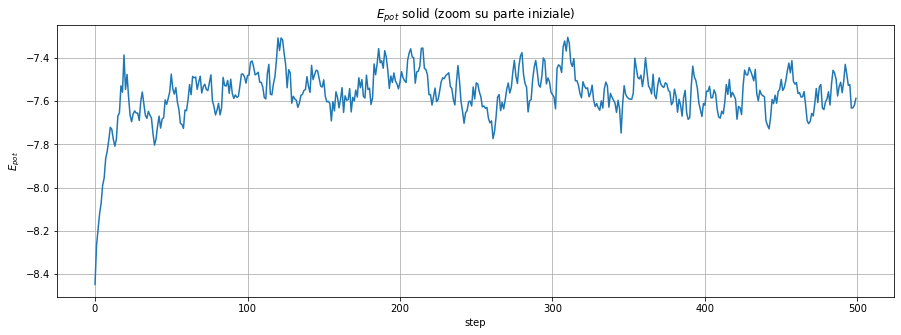

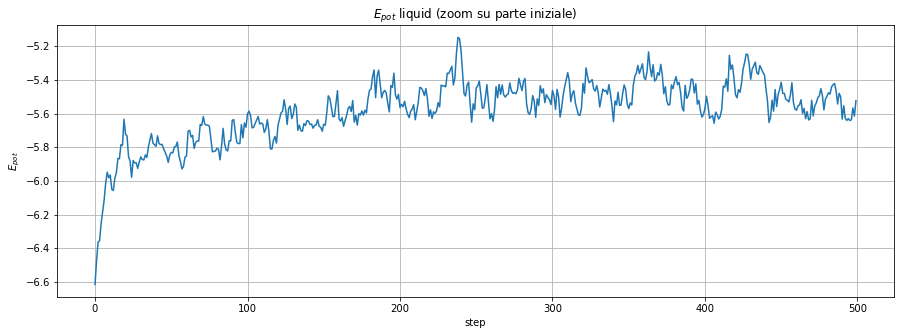

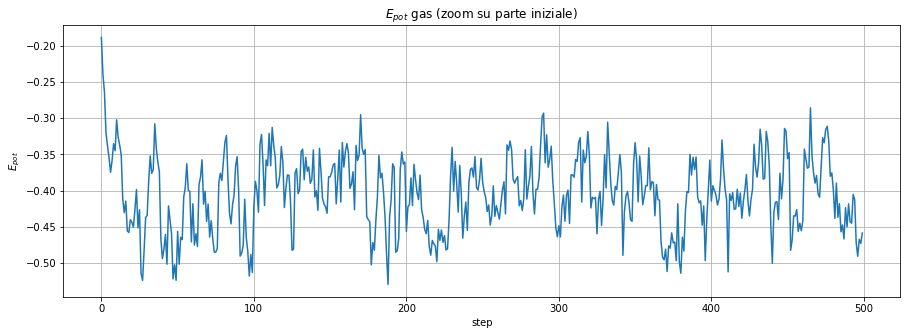

In [2]:
epot_eq_S_new=epot_eq_S[0:500]
epot_eq_L_new=epot_eq_L[0:500]
epot_eq_G_new=epot_eq_G[0:500]

x=np.arange(0, 500,1)

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(x,epot_eq_S_new, label="solid")
plt.xlabel('step')
plt.ylabel("$E_{pot}$")
plt.grid(True)
plt.title("$E_{pot}$ solid (zoom su parte iniziale)")
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(x,epot_eq_L_new, label="liquid")
plt.xlabel('step')
plt.ylabel("$E_{pot}$")
plt.grid(True)
plt.title("$E_{pot}$ liquid (zoom su parte iniziale)")
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(x,epot_eq_G_new, label="gas")
plt.xlabel('step')
plt.ylabel("$E_{pot}$")
plt.grid(True)
plt.title("$E_{pot}$ gas (zoom su parte iniziale)")
plt.show()

### funzione di autocorrelazione

ho poi tentato di stimare la correlazione tra i risultati in funzione di diversi intervalli temporali (0 a 1000 step).
ma ho ottenuto dubbi risultati.

In [15]:
def chi(v,t):
    tmax=len(v)
    var=np.var(v)
    dt=1/(tmax-t)
    sum1=0
    sum2=0
    sum3=0
    for i in range (tmax-t):
        sum1=sum1+v[i]*v[i+t]
        sum2=sum2+v[i]
        sum3=sum3+v[i+t]
    chi=dt*sum1-dt*dt*sum2*sum3/var  
    return chi;

x=range(1000)

epot_eq_S=epot_eq_S[1000:5000]
pres_eq_S=pres_eq_S[1000:5000]
epot_eq_L=epot_eq_L[1000:5000]
pres_eq_L=pres_eq_L[1000:5000]
epot_eq_G=epot_eq_G[1000:5000]
pres_eq_G=pres_eq_G[1000:5000]

chi_epot_eq_S=np.zeros(len(x))
chi_pres_eq_S=np.zeros(len(x))
chi_epot_eq_L=np.zeros(len(x))
chi_pres_eq_L=np.zeros(len(x))
chi_epot_eq_G=np.zeros(len(x))
chi_pres_eq_G=np.zeros(len(x))

k=0
for i in x:
    chi_epot_eq_S[k]=chi(epot_eq_S,i)
    chi_pres_eq_S[k]=chi(pres_eq_S,i)
    chi_epot_eq_L[k]=chi(epot_eq_L,i)
    chi_pres_eq_L[k]=chi(pres_eq_L,i)
    chi_epot_eq_G[k]=chi(epot_eq_G,i)
    chi_pres_eq_G[k]=chi(pres_eq_G,i)
    k=k+1

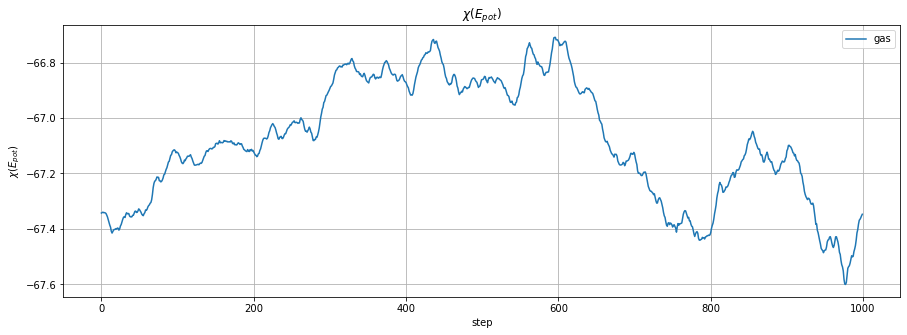

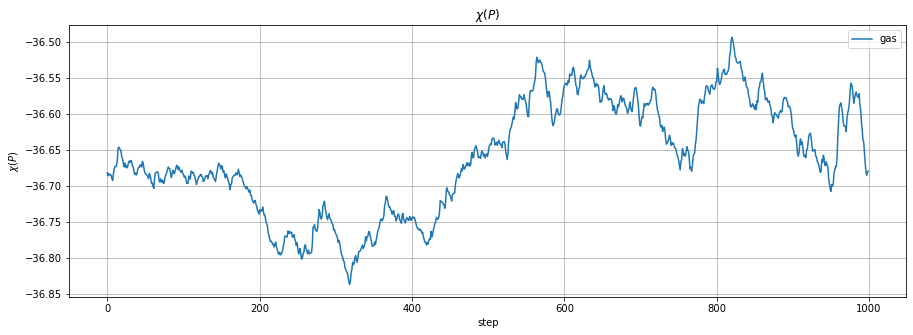

In [16]:
fig,g=plt.subplots(1, 1, figsize=(15, 5))
#plt.plot(x,chi_epot_eq_S, label="solid")
#plt.plot(x,chi_epot_eq_L, label="liquid")
plt.plot(x,chi_epot_eq_G, label="gas")
plt.xlabel('step')
plt.ylabel("$\chi(E_{pot})$")
plt.grid(True)
plt.title("$\chi(E_{pot})$")
plt.legend()
plt.show()

fig,g=plt.subplots(1, 1, figsize=(15, 5))
#plt.plot(x,chi_pres_eq_S, label="solid")
#plt.plot(x,chi_pres_eq_L, label="liquid")
plt.plot(x,chi_pres_eq_G, label="gas")
plt.xlabel('step')
plt.ylabel("$\chi(P)$")
plt.grid(True)
plt.title("$\chi(P)$")
plt.legend()
plt.show()

### componenti per blocco
ho poi suddiviso i $5*10^5$ step in blocchi di taglia crescente: da $10$ fino a $5*10^3$ componenti per blocco.
ho poi valutato l'incertezza statistica in funzione della grandezza dei blocchi per farlo ho calcolato la deviazionestandard della media tra i blocchi.
questo procedimento è stato fatto sia per l'energia che per la pressione nei 3 stati.


ciò che ne risulta è un andamento che tende a saturare dopo un certo valore, tale valore è quello che ci interessa ed è il valore ottimale da usare come dimensione dei blocchi.
nelle mie simulazioni ho quindi scelto di impostare $200$ componenti per blocco.

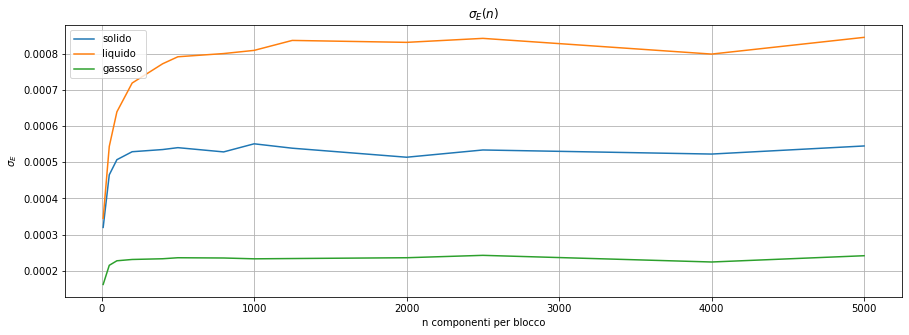

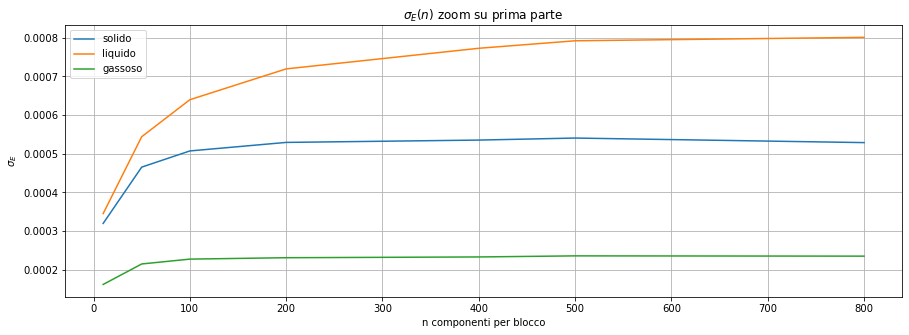

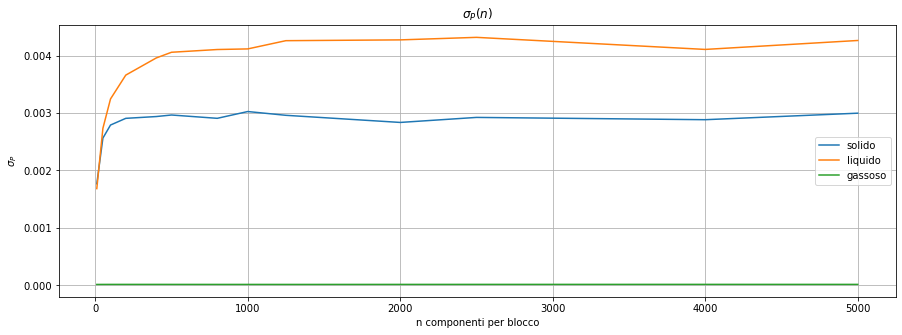

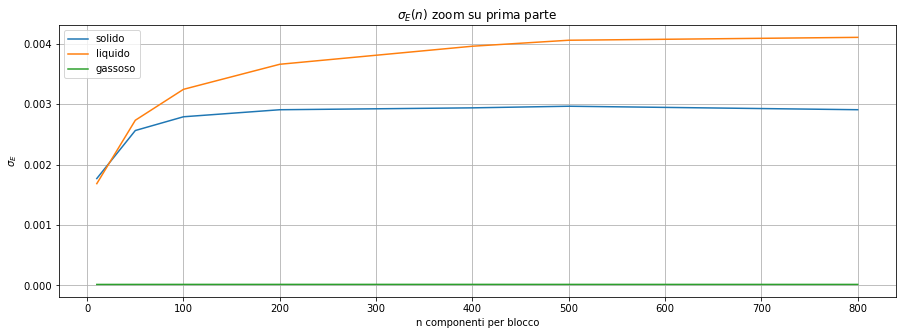

In [13]:
def media_blocchi(v,n_blocchi):
    n_componenti=int (len(v)/n_blocchi)
    v_ave=np.zeros(n_blocchi)
    for i in range(n_blocchi):
        v_ave[i]=sum(v[int(i*n_componenti):int((i+1)*n_componenti)])/n_componenti
    return v_ave

componenti=[10,50,100,200,400,500,800,1000,1250,2000,2500,4000,5000]
err_e_S=np.zeros(len(componenti))
err_e_L=np.zeros(len(componenti))
err_e_G=np.zeros(len(componenti))
err_p_S=np.zeros(len(componenti))
err_p_L=np.zeros(len(componenti))
err_p_G=np.zeros(len(componenti))
i=0
for n_componenti in componenti:
    n_blocchi=int (len(epot_eq_S)/n_componenti)
    media=np.zeros(n_blocchi)
    media=media_blocchi(epot_eq_S,n_blocchi)
    err_e_S[i]=(np.var(media)/n_blocchi)**0.5
    media=media_blocchi(epot_eq_L,n_blocchi)
    err_e_L[i]=(np.var(media)/n_blocchi)**0.5
    media=media_blocchi(epot_eq_G,n_blocchi)
    err_e_G[i]=(np.var(media)/n_blocchi)**0.5
    media=media_blocchi(pres_eq_S,n_blocchi)
    err_p_S[i]=(np.var(media)/n_blocchi)**0.5
    media=media_blocchi(pres_eq_L,n_blocchi)
    err_p_L[i]=(np.var(media)/n_blocchi)**0.5
    media=media_blocchi(pres_eq_G,n_blocchi)
    err_p_G[i]=(np.var(media)/n_blocchi)**0.5
    i=i+1

    
fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(componenti,err_e_S, label="solido")
plt.plot(componenti,err_e_L, label="liquido")
plt.plot(componenti,err_e_G, label="gassoso")
plt.xlabel('n componenti per blocco')
plt.ylabel("$\sigma_E$")
plt.grid(True)
plt.title("$\sigma_E(n)$")
plt.legend()
plt.show()

componenti=[10,50,100,200,400,500,800]
err_e_S=err_e_S[0:len(componenti)]
err_e_L=err_e_L[0:len(componenti)]
err_e_G=err_e_G[0:len(componenti)]   
fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(componenti,err_e_S, label="solido")
plt.plot(componenti,err_e_L, label="liquido")
plt.plot(componenti,err_e_G, label="gassoso")
plt.xlabel('n componenti per blocco')
plt.ylabel("$\sigma_E$")
plt.grid(True)
plt.title("$\sigma_E(n)$ zoom su prima parte")
plt.legend()
plt.show()

componenti=[10,50,100,200,400,500,800,1000,1250,2000,2500,4000,5000]
fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(componenti,err_p_S, label="solido")
plt.plot(componenti,err_p_L, label="liquido")
plt.plot(componenti,err_p_G, label="gassoso")
plt.xlabel('n componenti per blocco')
plt.ylabel("$\sigma_P$")
plt.grid(True)
plt.title("$\sigma_P(n)$")
plt.legend()
plt.show()

componenti=[10,50,100,200,400,500,800]
err_p_S=err_p_S[0:len(componenti)]
err_p_L=err_p_L[0:len(componenti)]
err_p_G=err_p_G[0:len(componenti)] 
fig,g=plt.subplots(1, 1, figsize=(15, 5))
plt.plot(componenti,err_p_S, label="solido")
plt.plot(componenti,err_p_L, label="liquido")
plt.plot(componenti,err_p_G, label="gassoso")
plt.xlabel('n componenti per blocco')
plt.ylabel("$\sigma_E$")
plt.grid(True)
plt.title("$\sigma_E(n)$ zoom su prima parte")
plt.legend()
plt.show()